In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]   = (15, 5)

# CONTAINERS

In [12]:
WEIGTHS = np.random.uniform(0, 50, size = 1000)
WEIGTHS = np.append(WEIGTHS, np.random.uniform(0, 20, size = 1000))

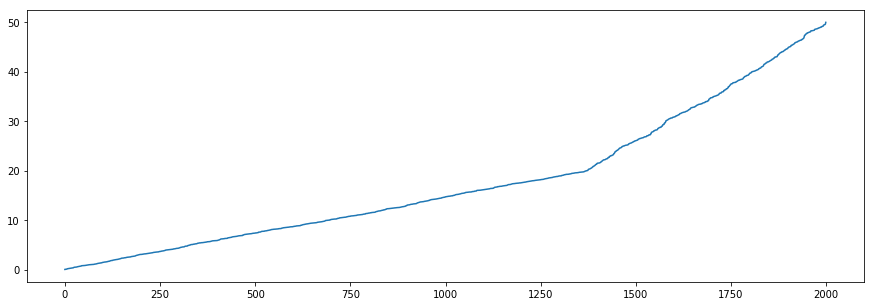

In [13]:
# plt.figure(figsize=(15, 5))
plt.plot(sorted(WEIGTHS));

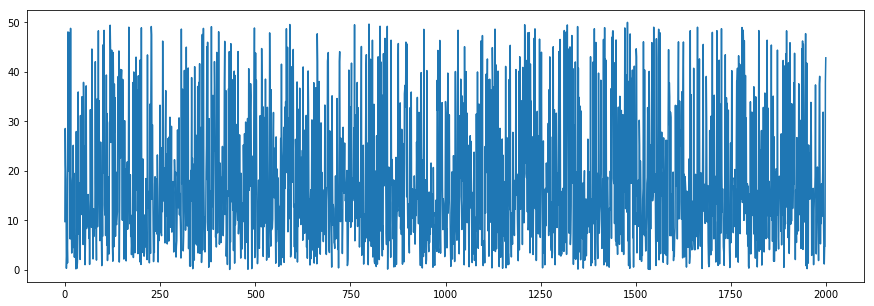

In [14]:
WEIGTHS = np.random.permutation(WEIGTHS)
plt.plot(WEIGTHS)

In [15]:
# Volume
V = 100
# Num of containers
N = 20

In [16]:
class Container:
    def __init__(self, V):
        self.V = V
        self._create_container()
        self.ready = True
        
    def _create_container(self):
        self.data = np.array([])
        self.rest = self.V
        
    def dump(self, weight):
        if self.rest > weight:
            self.data = np.append(self.data, weight)
            self.rest -= weight
            return True
        else:
            self.ready = False
            return False
        
    def get_weight(self):
        return self.V - self.rest
    
        
        

In [17]:
class Ship:
    def __init__(self, n_containers, V, mod = 0):
        self.n_containers = n_containers
        self.mod = mod
        self.V = V
        self.containers = []
        self._init()
        
    def _init(self):
        for _ in range(self.n_containers):
            self.containers.append(Container(self.V))
            
    def load(self, data):
        if self.mod == 0:
            self._load_0(data)
        else:
            self._load_1(data)
            
    def _load_0(self, data):
        i_cont = 0
        data = list(data)
        data.reverse()
        ok = True
        
        while data:
            if ok:
                weight = data.pop()
            ok = self.containers[i_cont].dump(weight)
            if not ok:
                i_cont += 1
                if i_cont == self.n_containers:
                    print('It is full')
                    return data.reverse()
                continue
                
    def _load_1(self, data):
        i_cont = 0
        data = list(data)
        data = sorted(data)
        
        while data:
            i_cont = 0
            while True:
                weight = data.pop()
                ok = self.containers[i_cont].dump(weight)
                i_cont += 1
                if ok or i_cont == self.n_containers:
                    break              
                
    def show(self):
        data = []
        rests = []
        for container in ship.containers:
            data.append(sum(container.data))
            rests.append(container.rest)
        fig, ax = plt.subplots()
        rects1 = ax.bar(np.arange(len(data)), [self.V] * len(data) , )
#         plt.
        plt.bar(np.arange(len(data)) , data, )
        
        for val, rect in zip(rests, rects1):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    np.round(val, 1),
                    ha='center', va='bottom')
            
        plt.show()
        NUM = np.round(sum(rests), 1)
        DEN = self.V * self.n_containers * 1.0
        print(f"Rest: {NUM}/{DEN} ")
        print(f"{(NUM / DEN) * 100}% is empty")

In [20]:
ship = Ship(40, 100)
ship.load(WEIGTHS)

It is full


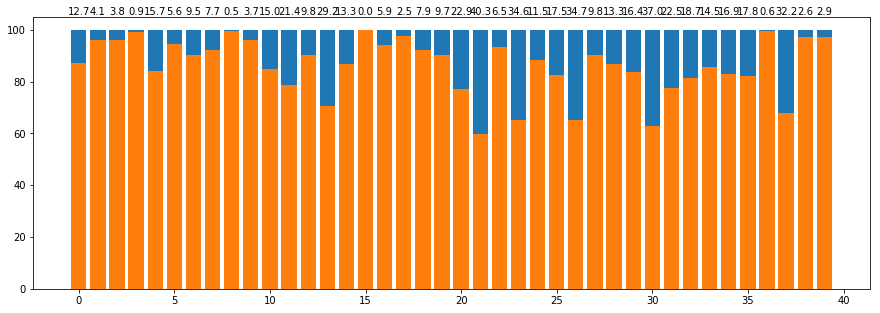

Rest: 551.9/4000.0 
13.7975% is empty


In [21]:
ship.show()

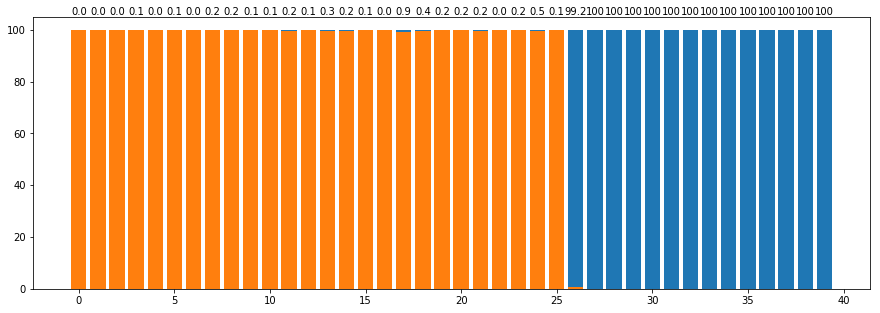

Rest: 1403.6/4000.0 
35.089999999999996% is empty


In [22]:
ship = Ship(40, 100, mod = 1)
ship.load(WEIGTHS)
ship.show()